In [2]:
import torch
print(torch.__version__)

2.3.1


我们先讨论使用y=wx这个简单的线性模型。使用穷举法，求出Cost Function关于权重w的关系和图像。

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

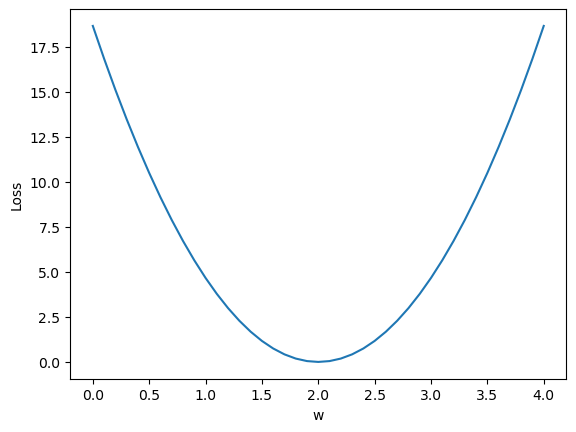

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)**2

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print('w=',w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val,y_val)
        l_sum +=loss_val
        print('\t',x_val,y_val, y_pred_val,loss_val)
    print('MSE=', l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)

plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

有了上面的基础，现在讨论一下model: y = wx+b ，这时，除了有权重w，还有一个bias b，所以Cost function的图像应该是一个三维的，w，b为自变量的曲面。

w= 0.0
b= -4.0
	 1.0 2.0 -4.0 36.0
	 2.0 4.0 -4.0 64.0
	 3.0 6.0 -4.0 100.0
MSE= 66.66666666666667
w= 0.0
b= -3.9
	 1.0 2.0 -3.9 34.81
	 2.0 4.0 -3.9 62.410000000000004
	 3.0 6.0 -3.9 98.01
MSE= 65.07666666666667
w= 0.0
b= -3.8
	 1.0 2.0 -3.8 33.64
	 2.0 4.0 -3.8 60.839999999999996
	 3.0 6.0 -3.8 96.04000000000002
MSE= 63.50666666666667
w= 0.0
b= -3.6999999999999997
	 1.0 2.0 -3.6999999999999997 32.489999999999995
	 2.0 4.0 -3.6999999999999997 59.28999999999999
	 3.0 6.0 -3.6999999999999997 94.08999999999999
MSE= 61.956666666666656
w= 0.0
b= -3.5999999999999996
	 1.0 2.0 -3.5999999999999996 31.359999999999996
	 2.0 4.0 -3.5999999999999996 57.76
	 3.0 6.0 -3.5999999999999996 92.16
MSE= 60.426666666666655
w= 0.0
b= -3.4999999999999996
	 1.0 2.0 -3.4999999999999996 30.25
	 2.0 4.0 -3.4999999999999996 56.25
	 3.0 6.0 -3.4999999999999996 90.25
MSE= 58.916666666666664
w= 0.0
b= -3.3999999999999995
	 1.0 2.0 -3.3999999999999995 29.159999999999993
	 2.0 4.0 -3.3999999999999995 54.7599999999999

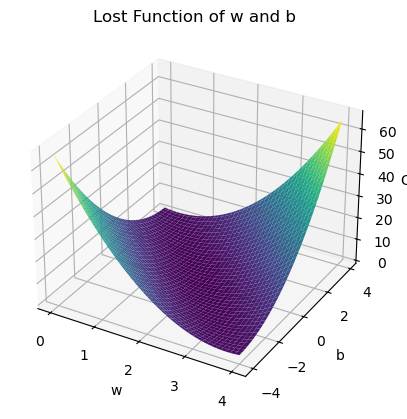

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#data set
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

#define a model
def forward(x):
    return x*w+b

#define a loss function
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

# range and step of w and b

w_range = np.arange(0.0, 4.1, 0.1)
b_range = np.arange(-4.0,4.0, 0.1)

#initialation value
#将w，b网格化
W,B = np.meshgrid(w_range,b_range)
#创建一个和W相同的全0数组
MSE = np.zeros_like(W)

#build the cost function
for i,w in enumerate(w_range):
    for j,b in enumerate(b_range):
        print('w=',w)
        print('b=',b)
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            y_pred_val = forward(x_val)
            loss_val = loss(x_val,y_val)
            l_sum +=loss_val
            MSE[j,i] = l_sum / len(x_data)
            print('\t',x_val,y_val, y_pred_val,loss_val)
        print('MSE=', l_sum/3)

#Creating a 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#drawing 3D graphics
ax.plot_surface(W, B, MSE, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Lost Function of w and b')

plt.show()

然而在实际的应用中，采用穷举法并不能解决问题，一方面是无法找到Cost Function的globa minimum，而且随着权重的变多，形成的cost图像也不只是一个凸函数，给最小值的寻找带来了很多问题。
这时我们就引入了Gradient Descent梯度下降法来求得Cost Function的最小值。在深度学习默认的梯度下降法，我们都采用的是mini-batch的算法进行随机梯度下降。用这样的方法克服鞍点所带来的问题。

这里先以y=wx为例，引入梯度下降法